<a href="https://colab.research.google.com/github/Navyam-Raushan/Bulldozer_Price_Prediction_Regression_Problem/blob/main/Buldozer_Price_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting sales price using machine Learning

In this notebook, we're going to go through ml project with the goal of predicting sales of bulldozers.

## 1. Problem Definition

> How well we can predict the future sale price of a bulldozer, given its characterstics and previous example of how much similar buldozers have been sold of?
## 2. Data (EDA)
The data is downloaded from kaggle
Here is the link--
https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
Evaluation Metric is RMSLE(Root Mean Squared Log Error) <br>

The goal for this project is to build a model which minimises RMSLE.


## 4. Features
Here is details of all features on google sheets--
https://docs.google.com/spreadsheets/d/1_n5DPXwfhDDNJpktKomYinSOkIjOaIVuCmLp2uiQS8k/edit?usp=sharing


# Enabling GPU

In [ ]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import RandomForestRegressor


# Downloading Data from Github

* Here we will download Bulldozer pricing sales data from the github

In [ ]:
!wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip # download files from GitHub as zip

import os
import zipfile

local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.') # extract all data into current working directory
zip_ref.close()

--2024-03-25 11:53:35--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2024-03-25 11:53:35--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72077822 (69M) [application/zip]
Saving to: ‘bluebook-for-bulldozers.zip’

bluebook-for-bulldo 100%[===================>]  68.74M   139MB/s    in 0.5s    

2024-03-25 11:53:40 (139

In [ ]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False)

# Actually pandas is trying to decrease ram space but we don't need it

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [ ]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

## Note for Exploring Datasets in Timeseries Data

* First see na values
* Then plot most important cols
* And visualize most important cols
* Whenever We have timeseries data we need all data with reference to dates.

# Exploratory Data Analysis

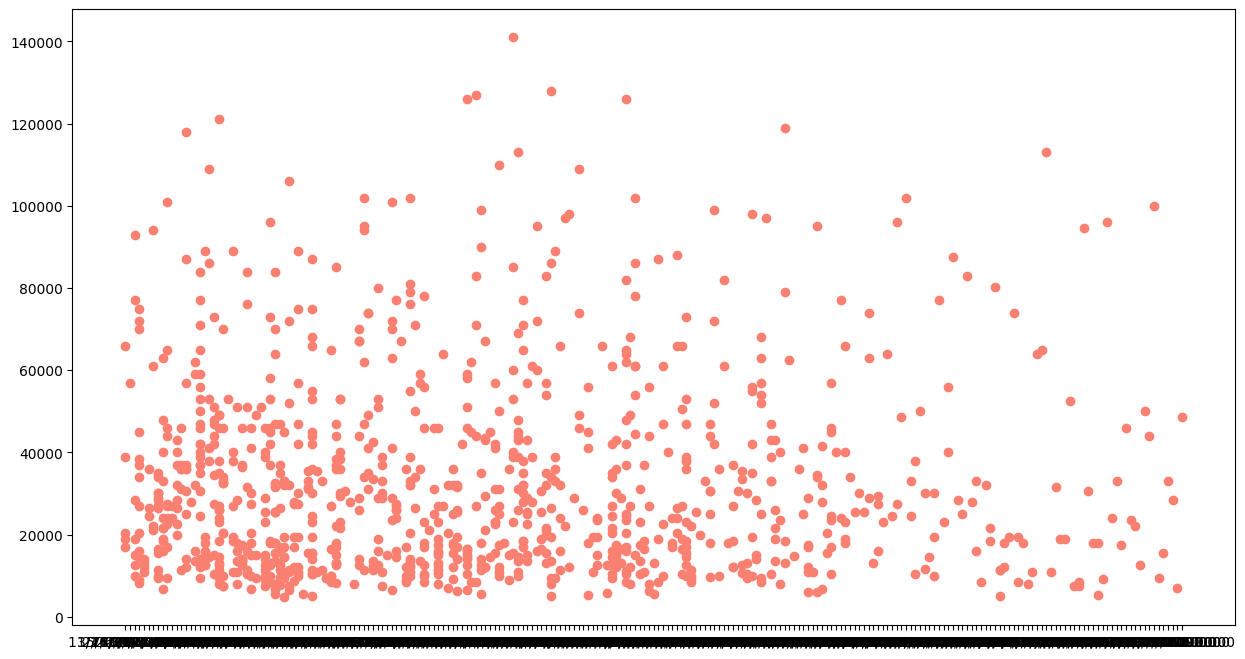

In [ ]:
# Let's visualize this data
# we can't plot all the data so just plot most important cols
# sales date(Time series problem), sales price

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000], color="salmon");



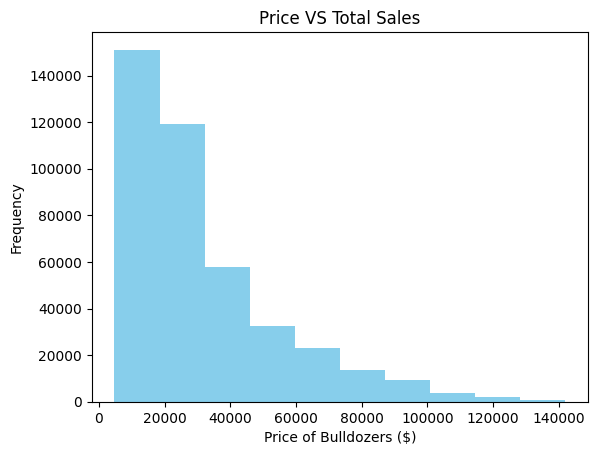

In [ ]:
df["SalePrice"].plot.hist(color="skyblue")
plt.xlabel("Price of Bulldozers ($)")
plt.title("Price VS Total Sales");

## Parsing Dates (Important for time series data)

We want to enrich time and component as much as possible
<br>
We will do it by using pandas pass dates parameters (to tell which cols are dateTime object)


In [ ]:
# import data again with the datasets
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [ ]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [ ]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

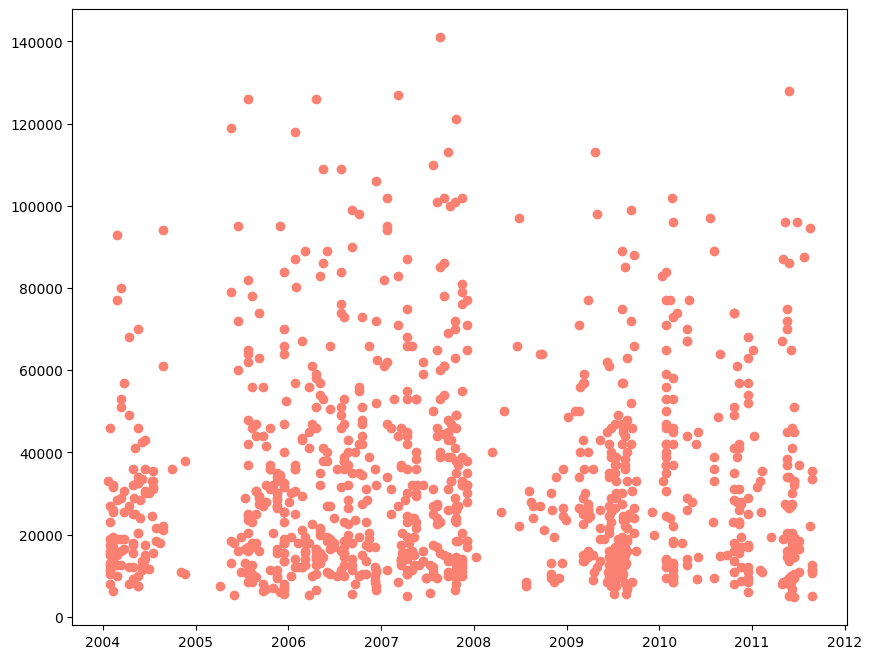

In [ ]:
# Let's plot again
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000], color="salmon")


In [ ]:
# To make this line curve i need to find total sales per year
# plt.plot(df["saledate"][:1000], df["SalePrice"][:1000], color="salmon")

### Make a copy of original data

In [ ]:
df_original = df.copy()
df_original.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

### Adding saleYear component to dataframe

In [ ]:
# temp = {}
# temp = df["saledate"].dt.year
# data = {"year": temp}
# data["year"][0]

# data = pd.DataFrame(data)

df["year"] = df["saledate"].dt.year
# Reaname year to saleYear
df = df.rename(columns={"year": "saleYear"})

df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sorting the dataframe by saledate

In [ ]:
# Sort dataframe with the date column (best for time series data)
# It will work only with datetime object

df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989


### Make a copy of sorted df
It will help us to make changes in df_temp without changing original one

In [ ]:
df_temp = df.copy()
df_temp.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

## Total Sales Per Year Analysis

In [ ]:
# Don't use for loops for 4 lakhs dat
# def sales_per_year(df):
#   sales = {}
#   for i in df["year"]:

#     sales[i] = df[df["year"]== i].count()

#   return sales
def count_sales_per_year(df, dateColumn):
  year_counts = df[dateColumn].dt.year.value_counts()

  # For sorting the year_counts we need it back in dictionary
  year_counts = dict(sorted(year_counts.items()))
  year_counts = pd.DataFrame.from_dict(year_counts, orient="index",
                                      columns=["count"])
  return year_counts

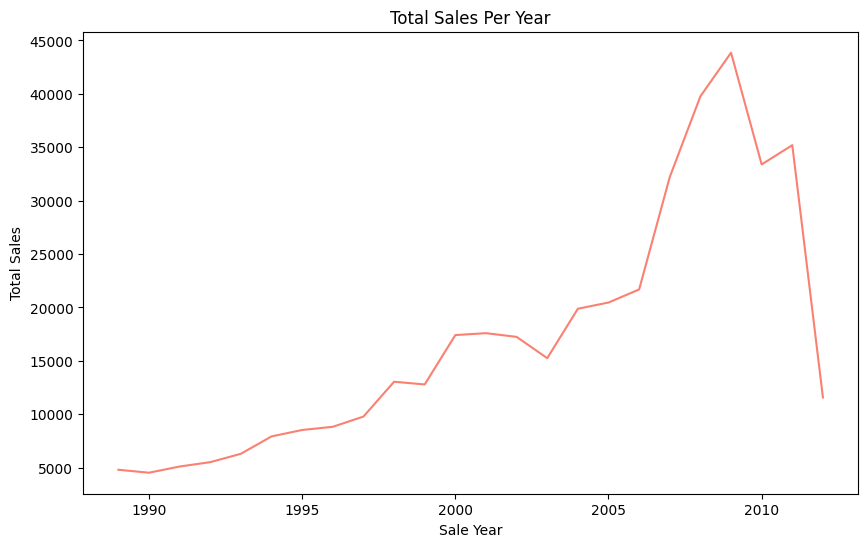

In [ ]:
year_counts = count_sales_per_year(df_temp, dateColumn="saledate")

year_counts.plot(figsize=(10, 6), color="salmon",
                 legend=False)
plt.xlabel("Sale Year")
plt.ylabel("Total Sales")
plt.title("Total Sales Per Year");

## Add Datetime parameters for `saledate` column

We can add each saleYear, sale date as I have added year

In [ ]:
df_temp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls',
       'saleYear'],
      dtype='object')

In [ ]:
# In this way we can access more of them check datetime functions only
df_temp["saledate"].dt.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saledate, Length: 412698, dtype: int64

In [ ]:
# We can check the states of USA where the sale is more
us_state = df_temp.state.value_counts()
us_state

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

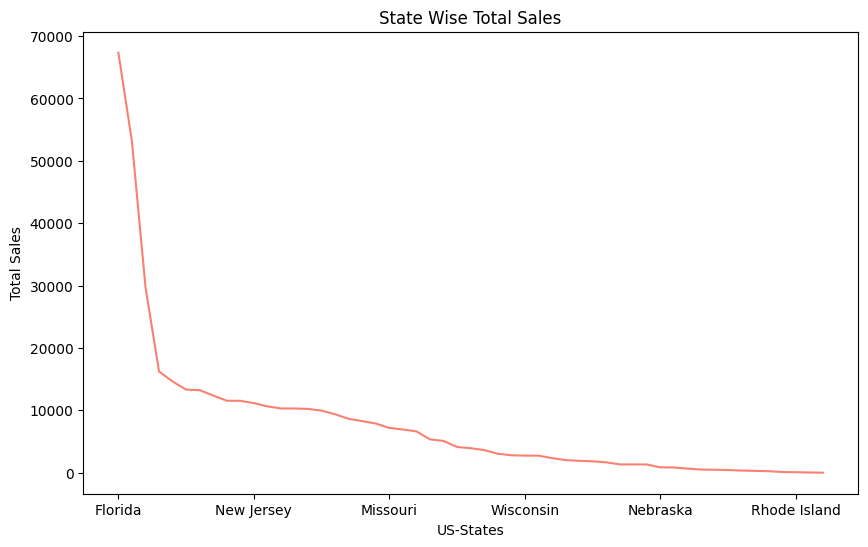

In [ ]:
us_state.plot(color="salmon", figsize=(10,6))
plt.xlabel("US-States")
plt.ylabel("Total Sales")
plt.title("State Wise Total Sales");

# Modelling - Model driven EDA

Take care of Non-numerical values(categorical values) and null values.

In [ ]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## Conversion of String Data into Categories

One way we can turn all our data into numbers by converting them into panda categories.

https://pandas.pydata.org/pandas-docs/version/1.3/reference/general_utility_functions.html

In [ ]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989


In [ ]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [ ]:
# Find columns which contain string and convert it
# Best way to find which columns are of string type
for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# Check what df.items() does here's an example
random_dict = {"A": "Navyam",
               "B": "Raushan"}
random_dict.items()

# Here A is the label and other is content

dict_items([('A', 'Navyam'), ('B', 'Raushan')])

In [ ]:
# This will turn all of string value into category value


for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content):

    # Put the content by changing its datatype
    df_temp[label] = content.astype("category").cat.as_ordered()


In [ ]:
# All strings datatype is converted into category
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

In [ ]:
# To check categories
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
# See here the all numbers representing each string
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

## Saving Preprocessed Data- df.temp

In [ ]:
df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

In [ ]:
# For Time saving just export modified df so we resume from here

df_temp.to_csv("bluebook-for-bulldozers/number_df.csv",
               index=False)

In [ ]:
# Re-Import the data now, In this Manner we have saved pre-processed Data.

df_temp = pd.read_csv("bluebook-for-bulldozers/number_df.csv",
                      low_memory=False)
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989


## Dealing With Missing Values



### Fill numerical missing values

In [ ]:
# Let's find which cols are numeric
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear


**Code For checking Missing values for numeric cols**

In [ ]:
# Check for which numeric cols we have missing values
# We are firstly getting numerical cols then in that
# We are looking for missing values (total sum)

for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)


auctioneerID
MachineHoursCurrentMeter


In [ ]:
pd.isnull(df["auctioneerID"])

205615    False
274835    False
141296    False
212552    False
62755     False
          ...  
410879    False
412476    False
411927    False
407124    False
409203    False
Name: auctioneerID, Length: 412698, dtype: bool

**Note** <br>
We are using *median* because for large number of values it's more robust and less sensitive to <br>
outlyers values as compared to mean. <br>
Putting a new binary col is to track the missing values even after it's filling.


In [ ]:
# Now we will fill these missing values with median for numerical cols(why ?)

for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():

      # Adding a binary col to track the missing values even after filling
      df_temp[label + "_is_missing"] = pd.isnull(content)

      # Filling missing values with median values for numerical cols
      df_temp[label] = content.fillna(content.median())



In [ ]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17,1989-01-31,1989-01-31,1989-01-31,1989-01-31


In [ ]:
df_temp.auctioneerID[:10]

0    18.0
1    99.0
2    99.0
3    99.0
4    99.0
5    99.0
6    99.0
7    99.0
8    99.0
9    99.0
Name: auctioneerID, dtype: float64

In [ ]:
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

# After this nothing is printed means all cols are filled

In [ ]:
# Let's check the value count for new columsn added
# Originally we have 20136 vlaues which are missing and that is still visible

df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [ ]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
saledate                                    0
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                         

### Filling non-numeric(categorical) values and turning into numbers

In [ ]:
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# Add 1 into codes because null values have -1 as category we need all positive

for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):

    # Add binary column again to indicate missing values
    df_temp[label + "_is_missing"] = pd.isnull(content)

    # Now convert that label content into numbers (pd.categorical)
    df_temp[label] = pd.Categorical(content).codes + 1


In [ ]:
# We don't want these values to be -1 that's why we are adding 1
# So 0 category represent null values

pd.Categorical(df["UsageBand"]).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [ ]:
# to find categories
# pd.Categorical(df_temp.state)

# from this we can see that these are numbers
pd.Categorical(df_temp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(47), float64(3), int16(5), int64(6), int8(40)
memory usage: 66.5 MB


In [ ]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [ ]:
df_temp.dtypes

SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 101, dtype: object

In [ ]:
df_temp.isna().sum()

# All the missing values are filled with 0 (that's one category)

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [ ]:
df_temp["UsageBand"][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: UsageBand, dtype: int8

## Fitting Data to Model
As of now our data has:
* No missing values
* All data is numeric

So we are ready to fit this data to model

In [ ]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,1,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
len(df_temp)

412698

In [ ]:
# This will calculate the running time of cell
%%time

# Instantiate model
# n_jobs=-1 means use all processors
# Random_state is same as np.random.seed

# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# # Fit the model
# model.fit(df_temp.drop("SalePrice", axis=1),
#           df_temp["SalePrice"])


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [ ]:
# Let's score the model on seen data
# This score is not relevant as it is on training set

# model.score(df_temp.drop("SalePrice", axis=1),
#           df_temp["SalePrice"])

### Helpful Command to check GPU is connected or not

In [ ]:

!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


## Splitting data into train/ validation set



In [ ]:

# Validation set is where year is 2012
df_temp_val = df_temp[df_temp.saleYear == 2012]

# Training set is where year is not equal to 2012
df_temp_train = df_temp[df_temp.saleYear !=2012]

len(df_temp_val), len(df_temp_train)

(11573, 401125)

### Now getting training and validation set

In [ ]:


X_train, y_train = df_temp_train.drop("SalePrice", axis=1), df_temp_train.SalePrice

X_valid, y_valid = df_temp_val.drop("SalePrice", axis=1), df_temp_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 100), (401125,), (11573, 100), (11573,))

### Building a RMSLE evaluation metrics

*Note*: Valid MAE should be less than training MAE otherwise model is overfitted

In [ ]:
# Let's create evaluation function as we will evaluate many models
# MSLE is mainly related to ratio (% off)
# MAE is mainly absolute (10 Rs off)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
  """
  Calculates root mean squared log error between predictions and
  true labels.

  """


  return  np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
# Here you only need to pass the regression model
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)


  # All Score metrics on trainin as well as validation set
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)}

  return scores



### Testing our model on a subset (to tune hyperparams)
* We need to decrease the time of fitting the model

* Ways to do this
  * We can decrease number of rows
  * Changing max_sample values

In [ ]:
# This Takes too long... for experimenting

# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)
# model.fit(X_train, y_train)

### Changing max_sample values

Roughly total models will = n_estimators  <br>
And each estimator goes each sample
<Br>
Hence total n_estimator*max_samples



In [ ]:
model1 = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [ ]:
%%time

# Cutting max number of samples will decrease time
model1.fit(X_train, y_train)

CPU times: user 38.3 s, sys: 366 ms, total: 38.6 s
Wall time: 42.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
train_preds = model1.predict(X_valid)
X_valid.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
401125,4449186,2318824,26964,173,99.0,1996,0.0,0,3920,2269,...,True,True,True,True,True,False,False,False,True,True
401126,1222855,531393,23926,121,3.0,1000,8145.0,2,3921,85,...,True,True,True,True,True,True,True,True,True,True
401127,6258613,1810917,13260,149,99.0,2000,24.0,2,3921,1115,...,True,True,True,True,True,True,True,True,True,True
401128,6282680,1543404,1830,149,99.0,2004,4373.0,3,3921,64,...,False,False,False,False,False,True,True,True,True,True
401129,6282759,1863077,11390,149,99.0,2006,3467.0,3,3921,139,...,False,False,False,False,False,True,True,True,True,True


In [ ]:
scoring_values = show_scores(model1)
scoring_values

{'Training MAE': 5365.703954502958,
 'Valid MAE': 7081.738183703447,
 'Training RMSLE': 0.25114529193628526,
 'Valid RMSLE': 0.28975725701149047,
 'Training R^2': 0.8685613924834594,
 'Valid R^2': 0.8358881365890737}

**By this Just simple Model we are in top 100 of kaggle with RMSLE of 0.28**

## Hyperparameter tuning with RandomisedSearchCV

* Just Google search how we can search for best hyperparameters

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RsCV
# Keep n_iter less otherwise it will take too much time(more than an hour)
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)


rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

CPU times: user 52.1 s, sys: 3.44 s, total: 55.5 s
Wall time: 41.5 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# Finding best Parameters
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
# Evaluate the randomiZed search model
show_scores(rs_model)

{'Training MAE': 5801.723320388944,
 'Valid MAE': 7355.822035700913,
 'Training RMSLE': 0.2667155778485316,
 'Valid RMSLE': 0.2999733897745258,
 'Training R^2': 0.8465901521579788,
 'Valid R^2': 0.8214110735265281}

**It's Worse now 0.39 (n_iter=2), So it may degrade too. We need to give more time for fitting (increasing n_iter)**

* And with n_iter=5 we have 0.31
* And train these on subsets otherwise it will take hours

## Train a model with the best Hyperparams

Note: These were found n_iter=100 so after 100 iterations

In [ ]:
%%time

# Here we have only 40 simple models not 100

ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    max_features=0.5,
                                    min_samples_split=14,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(X_train, y_train)

CPU times: user 3min 19s, sys: 695 ms, total: 3min 20s
Wall time: 2min 7s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [ ]:
# Training with whole data
show_scores(ideal_model)

{'Training MAE': 2963.2625957500127,
 'Valid MAE': 5980.6124981367975,
 'Training RMSLE': 0.14532215273542062,
 'Valid RMSLE': 0.24472087683814409,
 'Training R^2': 0.9586668471491187,
 'Valid R^2': 0.8799331252207765}

**With this MLSE= .2447 we are in top 30 (silver medal)**

In [ ]:
# Trained with 10000 data samples
show_scores(rs_model)

{'Training MAE': 5801.723320388944,
 'Valid MAE': 7355.822035700913,
 'Training RMSLE': 0.2667155778485316,
 'Valid RMSLE': 0.2999733897745258,
 'Training R^2': 0.8465901521579788,
 'Valid R^2': 0.8214110735265281}

In [ ]:
df_temp.saledate

0            1
1            2
2            2
3            2
4            2
          ... 
412693    4013
412694    4013
412695    4013
412696    4013
412697    4013
Name: saledate, Length: 412698, dtype: int16

# Make predictions on test data

In [ ]:
# Import test file
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

# This df hasn't any sale price column so it's our X_test

In [ ]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Conversion to Numbers and fill missing values

In [ ]:
# This data is in string format not in numbers it will cause error
# test_preds = ideal_model.predict(df_test)
df_test.isna().sum()


SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [ ]:
# It have only 53 columns
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
# it have 101 columns
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear',
       'auctioneerID_is_missing', 'MachineHoursCurrentMeter_is_missing',
     

In [ ]:


len(df_test.columns)

52

## Test Data preprocessing

In [ ]:
def preprocess_data(df):
  """
  Pefrorms Transformations on df and returns transformed df

  """
  df["saleYear"] = df["saledate"].dt.year

  # Manually we need to fix this auctioneerID column (add it)
  df_test["auctioneerID_is_missing"] = False
  # df.drop("saledate", axis=1)

  # for label, content in df_temp.items():
  #   if pd.api.types.is_string_dtype(content):

  #     # Put the content by changing its datatype
  #     df_temp[label] = content.astype("category").cat.as_ordered()


  # This code will convert every col to numbers and fill missing values.
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():

        # Adding a binary col to track the missing values even after filling
        df[label + "_is_missing"] = pd.isnull(content)

        # Filling missing values with median values for numerical cols
        df[label] = content.fillna(content.median())

    if not pd.api.types.is_numeric_dtype(content):
      df[label+ "_is_missing"] = pd.isnull(content)

      df[label] = pd.Categorical(content).codes + 1

  return df



In [ ]:
df_test = preprocess_data(df_test)

In [ ]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 100, dtype: int64

In [ ]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
len(X_train.columns), len(df_test.columns)

(100, 100)

In [ ]:
# We can see what columns are missing
set(X_train.columns) - set(df_test.columns)

set()

In [ ]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [ ]:
X_train.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [ ]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear',
       'auctioneerID_is_missing', 'MachineHoursCurrentMeter_is_missing',
     

## Test Data is ready for predictions

In [ ]:
# Make predictions now
test_preds = ideal_model.predict(df_test)

In [ ]:
test_preds

array([28762.59173795, 21652.68680552, 77276.82030254, ...,
       19203.9929833 , 22951.39624189, 33045.53294739])

## Checking the scores on test data

In [ ]:
# But how i will check scores rmsle if we have only test_preds
# we need true labels to compare also

# Format predictions into the same format as kaggle needs

In this format we need to provide submission

In [ ]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

df_preds

,SalesID,SalesPrice
0,1227829,28762.591738
1,1227844,21652.686806
2,1227847,77276.820303
3,1227848,68705.254155
4,1227863,58359.838636
...,...,...
12452,6643171,48601.122588
12453,6643173,18131.865144
12454,6643184,19203.992983
12455,6643186,22951.396242


## Export Predictions data

In [ ]:
df_preds.to_csv("bluebook-for-bulldozers/Submission_file_kaggle.csv")

# Feature Importance

What are the features which led us to this predictions

In [ ]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([2.91879486e-02, 1.82421439e-02, 4.23592885e-02, 1.13181657e-03,
       3.52279883e-03, 2.00103342e-01, 2.93537560e-03, 1.00526096e-03,
       6.62875001e-02, 4.43758423e-02, 4.27238194e-02, 6.77753986e-02,
       4.63521118e-03, 1.54045920e-02, 1.41490268e-01, 4.68045263e-02,
       6.61681599e-03, 3.04109605e-03, 1.90129578e-03, 3.07644327e-03,
       8.85430807e-02, 4.95779052e-04, 3.34682515e-04, 1.03571761e-03,
       1.81636540e-04, 1.21613860e-03, 2.28546308e-05, 5.34743394e-04,
       5.12896945e-03, 4.65181419e-03, 1.60493694e-04, 4.09911429e-03,
       1.32723391e-03, 3.66576263e-03, 9.53690586e-04, 6.32996058e-04,
       5.93218100e-03, 9.39875686e-04, 1.09765557e-02, 3.48398000e-03,
       4.38959425e-03, 1.27160812e-03, 8.92763103e-04, 3.27798025e-03,
       6.52066726e-04, 5.17130681e-04, 3.98567533e-04, 2.79412280e-04,
       2.55684350e-03, 7.79194165e-04, 3.19840724e-04, 2.88160036e-04,
       2.46222632e-02, 2.54200144e-04, 9.05274559e-04, 3.42782985e-04,
      

In [ ]:
len(ideal_model.feature_importances_)

100

In [ ]:
len(X_train.columns)

100

In [ ]:
# So for each column we have one value
# Helper function for plotting feature importance

def plot_features(columns, importances, n=20):

  df= (pd.DataFrame({"features": columns,
                     "feature_importances": importances})
      .sort_values("feature_importances", ascending=False)
      .reset_index(drop=True))

  # Plot the dataframe
  fig, ax = plt.subplots()


  ax.barh(df["features"][:n],
          df["feature_importances"][:n],
          color="salmon")

  ax.set_ylabel("Features")
  ax.set_xlabel("Feature Importances")

  # Inversion of yaxis values
  ax.invert_yaxis()


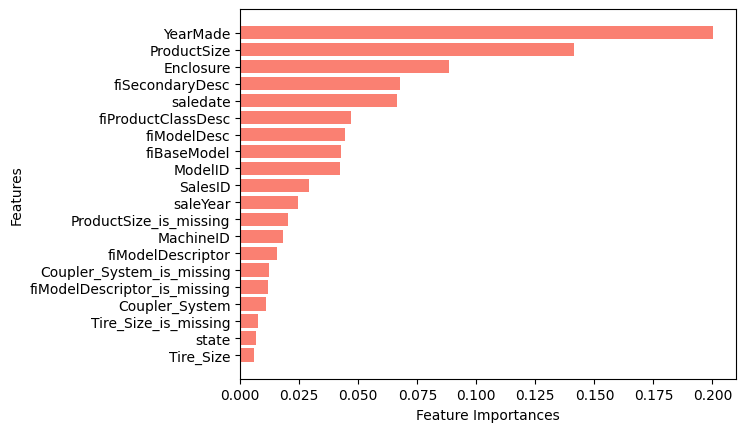

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [ ]:
# We can see what are features contributes more (plotted first 20)

**Finishing Question** <br>
Why might knowing feature importance is helpful for our model
<br>
What other models can be used on this same problem?
<br>
Checkout regression section of sklearn or check catboost.ai or xgboost.ai